In [100]:
import pandas as pd 

In [101]:
df = pd.read_csv("/Users/user/Desktop/Test/Fraud.csv")
df.info(),df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


(None,
    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
 0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
 1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
 2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
 3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
 4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   
 
       nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
 0  M1979787155             0.0             0.0        0               0  
 1  M2044282225             0.0             0.0        0               0  
 2   C553264065             0.0             0.0        1               0  
 3    C38997010         21182.0             0.0        1               0  
 4  M1230701703             0.0             0.0        0               0  )

In [102]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [103]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [104]:
df.duplicated().sum()

0


Outlier detection on log-transformed data

In [ ]:
import numpy as np

df = pd.read_csv("/Users/user/Desktop/Test/Fraud.csv")

num_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

df_log = df[num_cols].apply(lambda x: np.log1p(x))  
Q1_log = df_log.quantile(0.25)
Q3_log = df_log.quantile(0.75)
IQR_log = Q3_log - Q1_log


outliers_log = ((df_log < (Q1_log - 1.5 * IQR_log)) | (df_log > (Q3_log + 1.5 * IQR_log))).any(axis=1)

df_outliers = df[outliers_log]
df_clean = df[~outliers_log]

print(f"Number of outliers (log + IQR): {df_outliers.shape[0]}")


Number of outliers (log + IQR): 32429


Removed Outliers


In [106]:

df_clean = df[~outliers_log].reset_index(drop=True)


df_clean.to_csv('transactions.csv', index=False)

print(f"Cleaned dataset shape (outliers removed): {df_clean.shape}")


Cleaned dataset shape (outliers removed): (6330191, 11)


In [108]:
df = pd.read_csv("/Users/user/Desktop/Test/transactions.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
3,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
4,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6330186,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6330187,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6330188,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6330189,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df.corr(numeric_only=True, method='pearson')


print(corr_matrix)


                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.024976      -0.010062       -0.010303   
amount          0.024976  1.000000      -0.000126       -0.007036   
oldbalanceOrg  -0.010062 -0.000126       1.000000        0.998802   
newbalanceOrig -0.010303 -0.007036       0.998802        1.000000   
oldbalanceDest  0.027313  0.194869       0.069967        0.071634   
newbalanceDest  0.025583  0.340993       0.046547        0.046383   
isFraud         0.031616  0.106372       0.010186       -0.008167   
isFlaggedFraud  0.003286  0.016954       0.003835        0.003776   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.027313        0.025583  0.031616        0.003286  
amount                0.194869        0.340993  0.106372        0.016954  
oldbalanceOrg         0.069967        0.046547  0.010186        0.003835  
newbalanceOrig        0.071634        0.046383 -0.008167        0.003776  
old

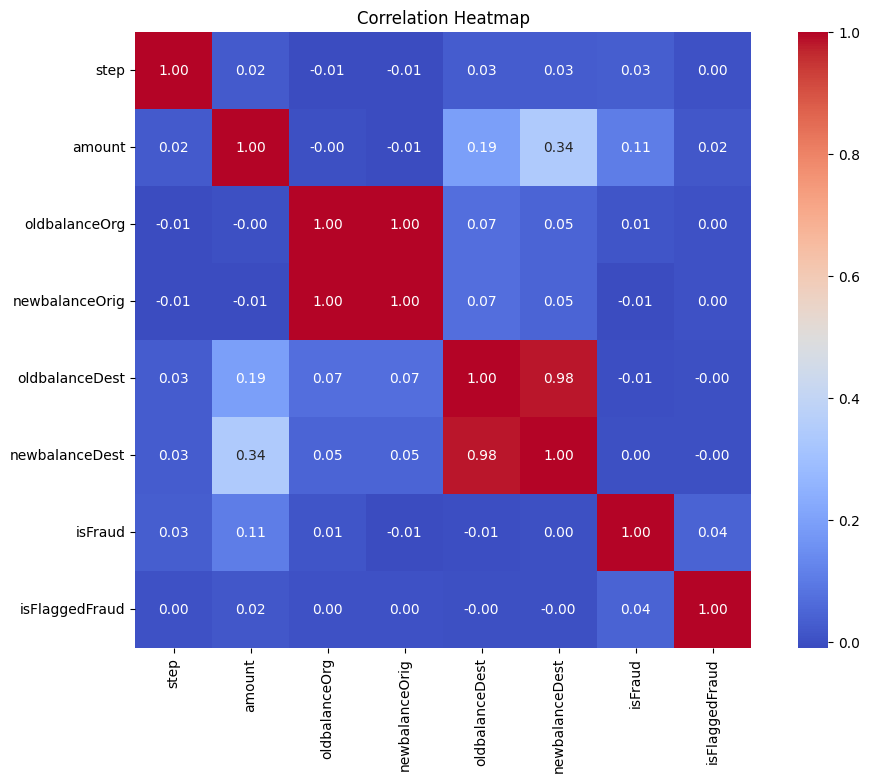

In [177]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()


In [109]:
df['isFraud'].value_counts()

isFraud
0    6322014
1       8177
Name: count, dtype: int64

In [110]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6330175
1         16
Name: count, dtype: int64

In [111]:
df['type'].value_counts()

type
CASH_OUT    2235895
PAYMENT     2124951
CASH_IN     1398246
TRANSFER     530998
DEBIT         40101
Name: count, dtype: int64

In [112]:
df['step'].value_counts().nunique()

433

In [113]:
df.groupby('type')[['isFraud', 'isFlaggedFraud']].sum()


,isFraud,isFlaggedFraud
type,,
CASH_IN,0,0
CASH_OUT,4090,0
DEBIT,0,0
PAYMENT,0,0
TRANSFER,4087,16


In [ ]:
import numpy as np

data = df.copy()


data['OrigC'] = np.where(data['nameOrig'].str.startswith('C'), 1, 0)
data['DestC'] = np.where(data['nameDest'].str.startswith('C'), 1, 0)


data['TRANSFER'] = np.where(data['type'] == 'TRANSFER', 1, 0)
data['CASH_OUT'] = np.where(data['type'] == 'CASH_OUT', 1, 0)
data['PAYMENT'] = np.where(data['type'] == 'PAYMENT', 1, 0)
data['DEBIT'] = np.where(data['type'] == 'DEBIT', 1, 0)
data['CASH_IN'] = np.where(data['type'] == 'CASH_IN', 1, 0)



In [115]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,OrigC,DestC,TRANSFER,CASH_OUT,PAYMENT,DEBIT,CASH_IN
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,1,0,0,0,1,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1,0,0,0,1,0,0
2,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,1,0,0,0,1,0,0
3,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0,1,0,0,0,1,0,0
4,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330186,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1,1,0,1,0,0,0
6330187,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,1,1,1,0,0,0,0
6330188,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1,1,0,1,0,0,0
6330189,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,1,1,1,0,0,0,0


In [116]:
data.drop(['type','nameOrig', 'nameDest'], axis=1, inplace=True)


In [117]:
data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,OrigC,DestC,TRANSFER,CASH_OUT,PAYMENT,DEBIT,CASH_IN
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,1,0,0,0,1,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,1,0,0,0,1,0,0
2,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,1,0,0,0,1,0,0
3,1,7817.71,53860.00,46042.29,0.00,0.00,0,0,1,0,0,0,1,0,0
4,1,7107.77,183195.00,176087.23,0.00,0.00,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330186,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,1,1,0,1,0,0,0
6330187,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,1,1,1,0,0,0,0
6330188,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,1,1,0,1,0,0,0
6330189,743,850002.52,850002.52,0.00,0.00,0.00,1,0,1,1,1,0,0,0,0


In [66]:
from sklearn.model_selection import train_test_split

X = data.drop(['isFraud'], axis=1)
y = data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


joblib.dump(model, 'random_forest_model.pkl')



              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1264076
           1       0.98      0.79      0.88      1635

    accuracy                           1.00   1265711
   macro avg       0.99      0.90      0.94   1265711
weighted avg       1.00      1.00      1.00   1265711



['random_forest_model.pkl']

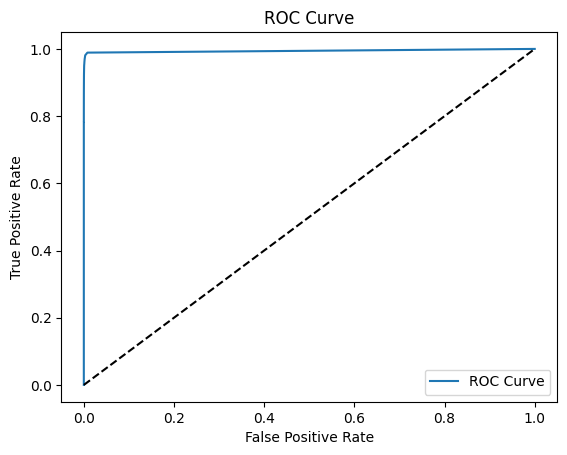

In [73]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Testing the Model 



In [ ]:
import pandas as pd

sample_data = pd.DataFrame({
    'step': [1, 1, 1, 2, 2],
    'type': ['TRANSFER', 'CASH_OUT', 'PAYMENT', 'DEBIT', 'TRANSFER'],
    'amount': [100000.0, 25000.0, 300.0, 9500.0, 540000.0],
    'nameOrig': ['C1234567890', 'C0987654321', 'C1111111111', 'C2222222222', 'C3333333333'],
    'oldbalanceOrg': [100000.0, 25000.0, 1000.0, 10000.0, 540000.0],
    'newbalanceOrig': [0.0, 0.0, 700.0, 500.0, 0.0],
    'nameDest': ['C9876543210', 'C1234509876', 'M1234567890', 'M0987654321', 'C1112223334'],
    'oldbalanceDest': [0.0, 5000.0, 0.0, 0.0, 200000.0],
    'newbalanceDest': [100000.0, 30000.0, 300.0, 9500.0, 740000.0],
})


print(sample_data)


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER  100000.0  C1234567890       100000.0             0.0   
1     1  CASH_OUT   25000.0  C0987654321        25000.0             0.0   
2     1   PAYMENT     300.0  C1111111111         1000.0           700.0   
3     2     DEBIT    9500.0  C2222222222        10000.0           500.0   
4     2  TRANSFER  540000.0  C3333333333       540000.0             0.0   

      nameDest  oldbalanceDest  newbalanceDest  
0  C9876543210             0.0        100000.0  
1  C1234509876          5000.0         30000.0  
2  M1234567890             0.0           300.0  
3  M0987654321             0.0          9500.0  
4  C1112223334        200000.0        740000.0  


In [91]:
data2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,TRANSFER,100000.0,C1234567890,100000.0,0.0,C9876543210,0.0,100000.0
1,1,CASH_OUT,25000.0,C0987654321,25000.0,0.0,C1234509876,5000.0,30000.0
2,1,PAYMENT,300.0,C1111111111,1000.0,700.0,M1234567890,0.0,300.0
3,2,DEBIT,9500.0,C2222222222,10000.0,500.0,M0987654321,0.0,9500.0
4,2,TRANSFER,540000.0,C3333333333,540000.0,0.0,C1112223334,200000.0,740000.0


In [ ]:
import numpy as np

data1 = data2.copy()


data1['OrigC'] = np.where(data1['nameOrig'].str.startswith('C'), 1, 0)
data1['DestC'] = np.where(data1['nameDest'].str.startswith('C'), 1, 0)

# One-hot

data1['TRANSFER'] = np.where(data1['type'] == 'TRANSFER', 1, 0)
data1['CASH_OUT'] = np.where(data1['type'] == 'CASH_OUT', 1, 0)
data1['PAYMENT'] = np.where(data1['type'] == 'PAYMENT', 1, 0)
data1['DEBIT'] = np.where(data1['type'] == 'DEBIT', 1, 0)
data1['CASH_IN'] = np.where(data1['type'] == 'CASH_IN', 1, 0)

data1.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,OrigC,DestC,TRANSFER,CASH_OUT,PAYMENT,DEBIT,CASH_IN
0,1,TRANSFER,100000.0,C1234567890,100000.0,0.0,C9876543210,0.0,100000.0,1,1,1,0,0,0,0
1,1,CASH_OUT,25000.0,C0987654321,25000.0,0.0,C1234509876,5000.0,30000.0,1,1,0,1,0,0,0
2,1,PAYMENT,300.0,C1111111111,1000.0,700.0,M1234567890,0.0,300.0,1,0,0,0,1,0,0
3,2,DEBIT,9500.0,C2222222222,10000.0,500.0,M0987654321,0.0,9500.0,1,0,0,0,0,1,0
4,2,TRANSFER,540000.0,C3333333333,540000.0,0.0,C1112223334,200000.0,740000.0,1,1,1,0,0,0,0


In [ ]:
data1 = data1.drop(['type','nameOrig','nameDest'],axis=1)

data1.to_csv('test2.csv',index=False)

In [169]:
data1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,OrigC,DestC,TRANSFER,CASH_OUT,PAYMENT,DEBIT,CASH_IN
0,1,100000.0,100000.0,0.0,0.0,100000.0,1,1,1,0,0,0,0
1,1,25000.0,25000.0,0.0,5000.0,30000.0,1,1,0,1,0,0,0
2,1,300.0,1000.0,700.0,0.0,300.0,1,0,0,0,1,0,0
3,2,9500.0,10000.0,500.0,0.0,9500.0,1,0,0,0,0,1,0
4,2,540000.0,540000.0,0.0,200000.0,740000.0,1,1,1,0,0,0,0


In [ ]:
import pandas as pd
import joblib  


model = joblib.load("random_forest_model.pkl")  


new_data = pd.read_csv("/Users/user/Desktop/Test/test2.csv")


features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'OrigC', 'DestC', 'TRANSFER',
       'CASH_OUT', 'PAYMENT', 'DEBIT', 'CASH_IN']


for col in features:
    if col not in new_data.columns:
        new_data[col] = 0 


X_new = new_data[features]


predictions = model.predict(X_new)
new_data['isFraud_prediction'] = predictions


new_data.head()



,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,OrigC,DestC,TRANSFER,CASH_OUT,PAYMENT,DEBIT,CASH_IN,isFlaggedFraud,isFraud_prediction
0,1,100000.0,100000.0,0.0,0.0,100000.0,1,1,1,0,0,0,0,0,0
1,1,25000.0,25000.0,0.0,5000.0,30000.0,1,1,0,1,0,0,0,0,1
2,1,300.0,1000.0,700.0,0.0,300.0,1,0,0,0,1,0,0,0,0
3,2,9500.0,10000.0,500.0,0.0,9500.0,1,0,0,0,0,1,0,0,0
4,2,540000.0,540000.0,0.0,200000.0,740000.0,1,1,1,0,0,0,0,0,0


1.Data cleaning

    I began by checking for missing values and handled them using median imputation for numerical fields and mode for categorical ones.
    For outliers, I first applied log transformation to reduce skewness in high-range features 



2.Describe your fraud detection model

    I used a Random Forest Classifier for fraud detection because it handles large datasets well, deals with class imbalance effectively, which will improve prediction accuracy and reduce overfitting.
    Once the model gave a strong performance on the validation set, I saved it using joblib so it can be reused to predict fraud in new incoming data.

3.How did you select variables to be included in the model
        
        I selected variables based on correlation analysis, feature importance from Random Forest, and domain logic. I kept features that showed strong impact on fraud and removed highly correlated or irrelevant ones to improve model performance.

4.Demonstrate the performance of the model by using best set of tools.

    I evaluated the model using Accuracy, Precision, Recall, and F1-score to check balance between false positives and false negatives.
    I also used confusion matrix, ROC curve, and precision-recall curve to visualize results. The model performed well, especially in catching fraudulent transactions with high recall.


5.What are the key factors that predict fraudulent customer?

    From data analysis, most fraud cases occur in CASH_OUT (4,090 cases) and TRANSFER (4,087 cases, with 16 flagged). These two types are high-risk because they involve moving money out of accounts.
So, transaction type, especially TRANSFER and CASH_OUT, is a key factor in predicting fraud, along with whether the transaction was flagged (isFlaggedFraud).

6.Do these factors make sense? If yes, How? If not, How not?

    Yes, they make sense. CASH_OUT and TRANSFER involve money leaving an account, which is a common behavior in fraud. Fraudsters often transfer stolen money or cash it out quickly. The model detecting fraud in these types shows it's learning real-world fraud patterns accurately.

7.What kind of prevention should be adopted while company update its infrastructure?

    The company should add real-time fraud detection, use multi-factor authentication, monitor suspicious patterns, and Also, the trained fraud detection model should be saved and integrated into the updated system so it can automatically scan and predict fraud on new incoming data.

8.Assuming these actions have been implemented, how would you determine if they work?

    magine you want to see if certain things (like the amount of money transferred and balances) are connected or related to fraud. Correlation helps us find these connections.

    Correlation analysis shows us how things are connected in data.

    test the model’s accuracy before and after to see if the analysis


